In [1]:
import os,sys
import numpy as np
import subprocess
import matplotlib.pyplot as plt
sys.path.append('../aux-functions')
import IgbHandling as igb


In [2]:
fi = '/users/vgonalve/exec/EX0023/EX0023_Ox55_PEERP04_vm_afull.iga.gz' #'/project/s1074/exp906/pvi/exp906a17_vm_afull.iga.gz'

# checkLocation = np.array([[522, 187, 233], [77 , 142, 238],
#                           [171, 406, 270], [232, 258, 272], 
#                           [503, 390, 296], [319, 219, 243]])

checkLocation = np.array([[522, 168, 232], [77 , 142, 238],
                          [171, 406, 270], [232, 258, 272], 
                          [503, 357, 250], [319, 219, 243],
                          [104, 303, 136],[388, 345, 85]])*0.2/0.35

# regions
checkLocation = np.array([[186,121,26], [80,102,80],
                          [36,138,127], [291,222,137], 
                          [200,145,137]])#*0.2/0.35


checkLocation  =np.array([[93,140,67],[221 ,196 ,48]])#*0.35/0.2
checkLocation = np.round(checkLocation).astype(int)
  
# checkLocation  =np.array([[419,131,149],[305,89,160]])
# 0: CS Tip 00 
# 1: inferior RA 06
# 2: RAA 07
# 3: RA anterior 10 
# 4: LAA 11
# 5: LA anterior - valve right 17
# 6: RA Superior 05
# 186,121,26
checkLocation

array([[ 93, 140,  67],
       [221, 196,  48]])

In [7]:
index=0
with subprocess.Popen(["gzip","-dc",fi],stdout=subprocess.PIPE) as gz:
    with subprocess.Popen(['iga2igb',
                           "-x",str(checkLocation[index][0]),
                           "-y",str(checkLocation[index][1]),
                           "-z",str(checkLocation[index][2]),
                           "-t","0:1:-1","-","-"],stdin=gz.stdout,stdout=subprocess.PIPE) as iga:        # read the header
        
        
        # test = iga.stdout.read(1024)
        hdr = igb.ReadHeader(iga.stdout.read(1024),opened = True)
        # size of a single slice in time
        nx,ny,nz = hdr['x'],hdr['y'],hdr['z']
        dtype = np.short
        csize = nx*ny*nz*dtype().nbytes        
        
        vals = np.zeros(hdr['t'])
        for t in range(hdr['t']):
            vals[t] = np.frombuffer(iga.stdout.read(csize),dtype=dtype).reshape((nz,ny,nx))
        

vals = hdr['facteur']*vals + hdr['zero']

slice = 93 : 1 : 93
slice = 140 : 1 : 140
slice = 67 : 1 : 67
slice = 0 : 1 : -1
ifname = -
ofname = -
this is IGA2IGB $Rev: 2174 $
got an IGA file version 1
x=372  y=315  z=201  t=3434
got tval = ffff8000 = -32768 from header
 xslice becomes 93 : 1 : 93
 yslice becomes 140 : 1 : 140
 zslice becomes 67 : 1 : 67
 tslice becomes 0 : 1 : 3433
 1349900 foreground elements in map
       1 elements to output
23553180 elements
    3434 samples
 restart
      99 restart
     199 restart
     299 restart
     399 restart
     499 restart
     599 restart
     699 restart
     799 restart
     899 restart
     999 restart
    1099 restart
    1199 restart
    1299 restart
    1399 restart
    1499 restart
    1599 restart
    1699 restart
    1799 restart
    1899 restart
    1999 restart
    2099 restart
    2199 restart
    2299 restart
    2399 restart
    2499 restart
    2599 restart
    2699 restart
    2799 restart
    2899 restart
    2999 restart
    3099 restart
    3199 restart
    32

In [4]:
pacingIntervals = np.array([1,500,280,250,170,160,155,150,145,140,135,130,126,124,124,124,124])
pacingIntervals = np.array([1,500,280,250,230,200,190,180,175,170,165,160,150,145,140,140,140,140])
pacingIntervals = np.ones(50,int)*40

pacingTimes = np.cumsum([0,500,500,500,500,310,250,255,290])
#pacingTimes = np.cumsum(pacingIntervals)
# pacingTimes = np.array([1,280,450,620,790,960,1240])


In [8]:
index=1
with subprocess.Popen(["gzip","-dc",fi],stdout=subprocess.PIPE) as gz:
    with subprocess.Popen(['iga2igb',
                           "-x",str(checkLocation[index][0]),
                           "-y",str(checkLocation[index][1]),
                           "-z",str(checkLocation[index][2]),
                           "-t","0:1:-1","-","-"],stdin=gz.stdout,stdout=subprocess.PIPE) as iga:        # read the header
        
        
        # test = iga.stdout.read(1024)
        hdr = igb.ReadHeader(iga.stdout.read(1024),opened = True)
        # size of a single slice in time
        nx,ny,nz = hdr['x'],hdr['y'],hdr['z']
        dtype = np.short
        csize = nx*ny*nz*dtype().nbytes        
        
        vals_2 = np.zeros(hdr['t'])
        for t in range(hdr['t']):
            vals_2[t] = np.frombuffer(iga.stdout.read(csize),dtype=dtype).reshape((nz,ny,nx))
        

vals_2 = hdr['facteur']*vals_2 + hdr['zero']

slice = 221 : 1 : 221
slice = 196 : 1 : 196
slice = 48 : 1 : 48
slice = 0 : 1 : -1
ifname = -
ofname = -
this is IGA2IGB $Rev: 2174 $
got an IGA file version 1
x=372  y=315  z=201  t=3434
got tval = ffff8000 = -32768 from header
 xslice becomes 221 : 1 : 221
 yslice becomes 196 : 1 : 196
 zslice becomes 48 : 1 : 48
 tslice becomes 0 : 1 : 3433
 1349900 foreground elements in map
       1 elements to output
23553180 elements
    3434 samples
 restart
      99 restart
     199 restart
     299 restart
     399 restart
     499 restart
     599 restart
     699 restart
     799 restart
     899 restart
     999 restart
    1099 restart
    1199 restart
    1299 restart
    1399 restart
    1499 restart
    1599 restart
    1699 restart
    1799 restart
    1899 restart
    1999 restart
    2099 restart
    2199 restart
    2299 restart
    2399 restart
    2499 restart
    2599 restart
    2699 restart
    2799 restart
    2899 restart
    2999 restart
    3099 restart
    3199 restart
  

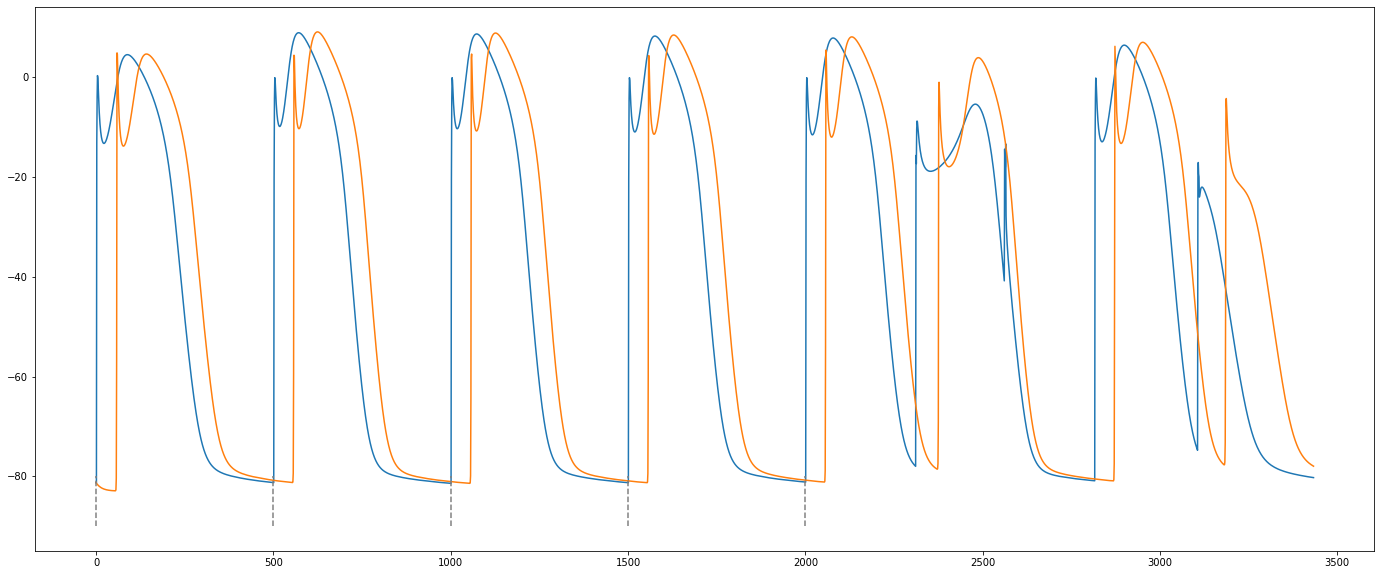

In [9]:
fig,ax = plt.subplots(1,figsize=(24,10))

pacingTimes=pacingTimes[pacingTimes<hdr['t']]
time = np.arange(hdr['t'])
ax.plot(time,vals)
ax.plot(time,vals_2,'-')
ax.vlines(time[pacingTimes],-90,-80,linestyle='dashed',color='gray')
# ax.vlines(390,-80,20)